In [1]:

import pandas as pd



from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# read data and put it in a dataframe
# spreadsheet = gc.open_by_url('/content/drive/MyDrive/My Food Diary.gsheet')
spreadsheet = gc.open('My Food Diary')
worksheet = spreadsheet.get_worksheet(1)
worksheet



food = pd.DataFrame(worksheet.get_all_records())



In [2]:
food.head()

,Day,Category,Ingredient,Link
0,1/31/2022,Morning Drink,Coffee,
1,1/31/2022,Breakfast,Spiced Cherry Granola Bar,https://meals.richroll.com/recipe/5c9a6fe6ebb6...
2,1/31/2022,Snack,Lily's Dark Chocolate,https://lilys.com/products/sea-salt
3,1/31/2022,Snack,Peanut Butter,
4,1/31/2022,Dinner,Ravioli,


✅ Connected Food Diary

## Next: Clean Food Diary

- Pull out Source column based on anything found before a colon

- Pull out ingredients based on tokenizing the rest by semi-colon


In [3]:
food.describe()

,Day,Category,Ingredient,Link
count,531,531,531,531
unique,66,7,324,6
top,6/28/2022,Snack,Coffee,
freq,13,205,40,526


In [4]:
len(food['Ingredient'][10].split(':'))

1

In [5]:
firstStep = [[i, len(food.Ingredient[i].split(':')), food.Ingredient[i].split(':')] for i in range(0, len(food))]

In [6]:
firstStep[0]

[0, 1, ['Coffee']]

In [7]:
fs_df = pd.DataFrame(data=firstStep, columns=['row', 'number of args', 'values'])

In [8]:
fs_df

,row,number of args,values
0,0,1,[Coffee]
1,1,1,[Spiced Cherry Granola Bar]
2,2,1,[Lily's Dark Chocolate]
3,3,1,[Peanut Butter]
4,4,1,[Ravioli]
...,...,...,...
526,526,1,[Cheese]
527,527,1,[Salami]
528,528,1,[Pasta; meat sauce]
529,529,1,[Crackers]


In [9]:
fs_df['Source'] = [None if fs_df['number of args'][i] == 1 else fs_df['values'][i][0] for i in range(0, len(fs_df))]

In [10]:
fs_df['values'][521][1:]

[" pancakes; lily's chocolate chips; banana"]

In [11]:
fs_df['Ingredients'] = [fs_df['values'][i][0] if fs_df['number of args'][i] == 1 else fs_df['values'][i][1:] for i in range(0, len(fs_df))]

In [12]:
fs_df

,row,number of args,values,Source,Ingredients
0,0,1,[Coffee],None,Coffee
1,1,1,[Spiced Cherry Granola Bar],None,Spiced Cherry Granola Bar
2,2,1,[Lily's Dark Chocolate],None,Lily's Dark Chocolate
3,3,1,[Peanut Butter],None,Peanut Butter
4,4,1,[Ravioli],None,Ravioli
...,...,...,...,...,...
526,526,1,[Cheese],None,Cheese
527,527,1,[Salami],None,Salami
528,528,1,[Pasta; meat sauce],None,Pasta; meat sauce
529,529,1,[Crackers],None,Crackers


In [13]:
fs_df['IngredientsStrings'] = ["".join(fs_df['Ingredients'][i]) for i in range(0, len(fs_df))]

In [14]:
fs_df

,row,number of args,values,Source,Ingredients,IngredientsStrings
0,0,1,[Coffee],None,Coffee,Coffee
1,1,1,[Spiced Cherry Granola Bar],None,Spiced Cherry Granola Bar,Spiced Cherry Granola Bar
2,2,1,[Lily's Dark Chocolate],None,Lily's Dark Chocolate,Lily's Dark Chocolate
3,3,1,[Peanut Butter],None,Peanut Butter,Peanut Butter
4,4,1,[Ravioli],None,Ravioli,Ravioli
...,...,...,...,...,...,...
526,526,1,[Cheese],None,Cheese,Cheese
527,527,1,[Salami],None,Salami,Salami
528,528,1,[Pasta; meat sauce],None,Pasta; meat sauce,Pasta; meat sauce
529,529,1,[Crackers],None,Crackers,Crackers


In [15]:
food.head()

,Day,Category,Ingredient,Link
0,1/31/2022,Morning Drink,Coffee,
1,1/31/2022,Breakfast,Spiced Cherry Granola Bar,https://meals.richroll.com/recipe/5c9a6fe6ebb6...
2,1/31/2022,Snack,Lily's Dark Chocolate,https://lilys.com/products/sea-salt
3,1/31/2022,Snack,Peanut Butter,
4,1/31/2022,Dinner,Ravioli,


In [16]:
food.index

RangeIndex(start=0, stop=531, step=1)

In [17]:
fs_df.index

RangeIndex(start=0, stop=531, step=1)

In [18]:
food.join(fs_df, how="inner")

,Day,Category,Ingredient,Link,row,number of args,values,Source,Ingredients,IngredientsStrings
0,1/31/2022,Morning Drink,Coffee,,0,1,[Coffee],None,Coffee,Coffee
1,1/31/2022,Breakfast,Spiced Cherry Granola Bar,https://meals.richroll.com/recipe/5c9a6fe6ebb6...,1,1,[Spiced Cherry Granola Bar],None,Spiced Cherry Granola Bar,Spiced Cherry Granola Bar
2,1/31/2022,Snack,Lily's Dark Chocolate,https://lilys.com/products/sea-salt,2,1,[Lily's Dark Chocolate],None,Lily's Dark Chocolate,Lily's Dark Chocolate
3,1/31/2022,Snack,Peanut Butter,,3,1,[Peanut Butter],None,Peanut Butter,Peanut Butter
4,1/31/2022,Dinner,Ravioli,,4,1,[Ravioli],None,Ravioli,Ravioli
...,...,...,...,...,...,...,...,...,...,...
526,8/14/2022,Snack,Cheese,,526,1,[Cheese],None,Cheese,Cheese
527,8/14/2022,Snack,Salami,,527,1,[Salami],None,Salami,Salami
528,8/14/2022,Dinner,Pasta; meat sauce,,528,1,[Pasta; meat sauce],None,Pasta; meat sauce,Pasta; meat sauce
529,8/14/2022,Snack,Crackers,,529,1,[Crackers],None,Crackers,Crackers


In [19]:
foodDF = food.join(fs_df, how="inner")[['Day', 'Category', 'Link', 'Source', 'IngredientsStrings', 'row']]

In [20]:
foodDF

,Day,Category,Link,Source,IngredientsStrings,row
0,1/31/2022,Morning Drink,,None,Coffee,0
1,1/31/2022,Breakfast,https://meals.richroll.com/recipe/5c9a6fe6ebb6...,None,Spiced Cherry Granola Bar,1
2,1/31/2022,Snack,https://lilys.com/products/sea-salt,None,Lily's Dark Chocolate,2
3,1/31/2022,Snack,,None,Peanut Butter,3
4,1/31/2022,Dinner,,None,Ravioli,4
...,...,...,...,...,...,...
526,8/14/2022,Snack,,None,Cheese,526
527,8/14/2022,Snack,,None,Salami,527
528,8/14/2022,Dinner,,None,Pasta; meat sauce,528
529,8/14/2022,Snack,,None,Crackers,529


In [21]:
foodDF_long = (foodDF.set_index(['Day', 'Category', 'Link', 'Source','row'])
   .apply(lambda x: x.str.split(';').explode())
   .reset_index())    

In [22]:
foodDF_long

,Day,Category,Link,Source,row,IngredientsStrings
0,1/31/2022,Morning Drink,,NaN,0,Coffee
1,1/31/2022,Breakfast,https://meals.richroll.com/recipe/5c9a6fe6ebb6...,NaN,1,Spiced Cherry Granola Bar
2,1/31/2022,Snack,https://lilys.com/products/sea-salt,NaN,2,Lily's Dark Chocolate
3,1/31/2022,Snack,,NaN,3,Peanut Butter
4,1/31/2022,Dinner,,NaN,4,Ravioli
...,...,...,...,...,...,...
826,8/14/2022,Snack,,NaN,527,Salami
827,8/14/2022,Dinner,,NaN,528,Pasta
828,8/14/2022,Dinner,,NaN,528,meat sauce
829,8/14/2022,Snack,,NaN,529,Crackers


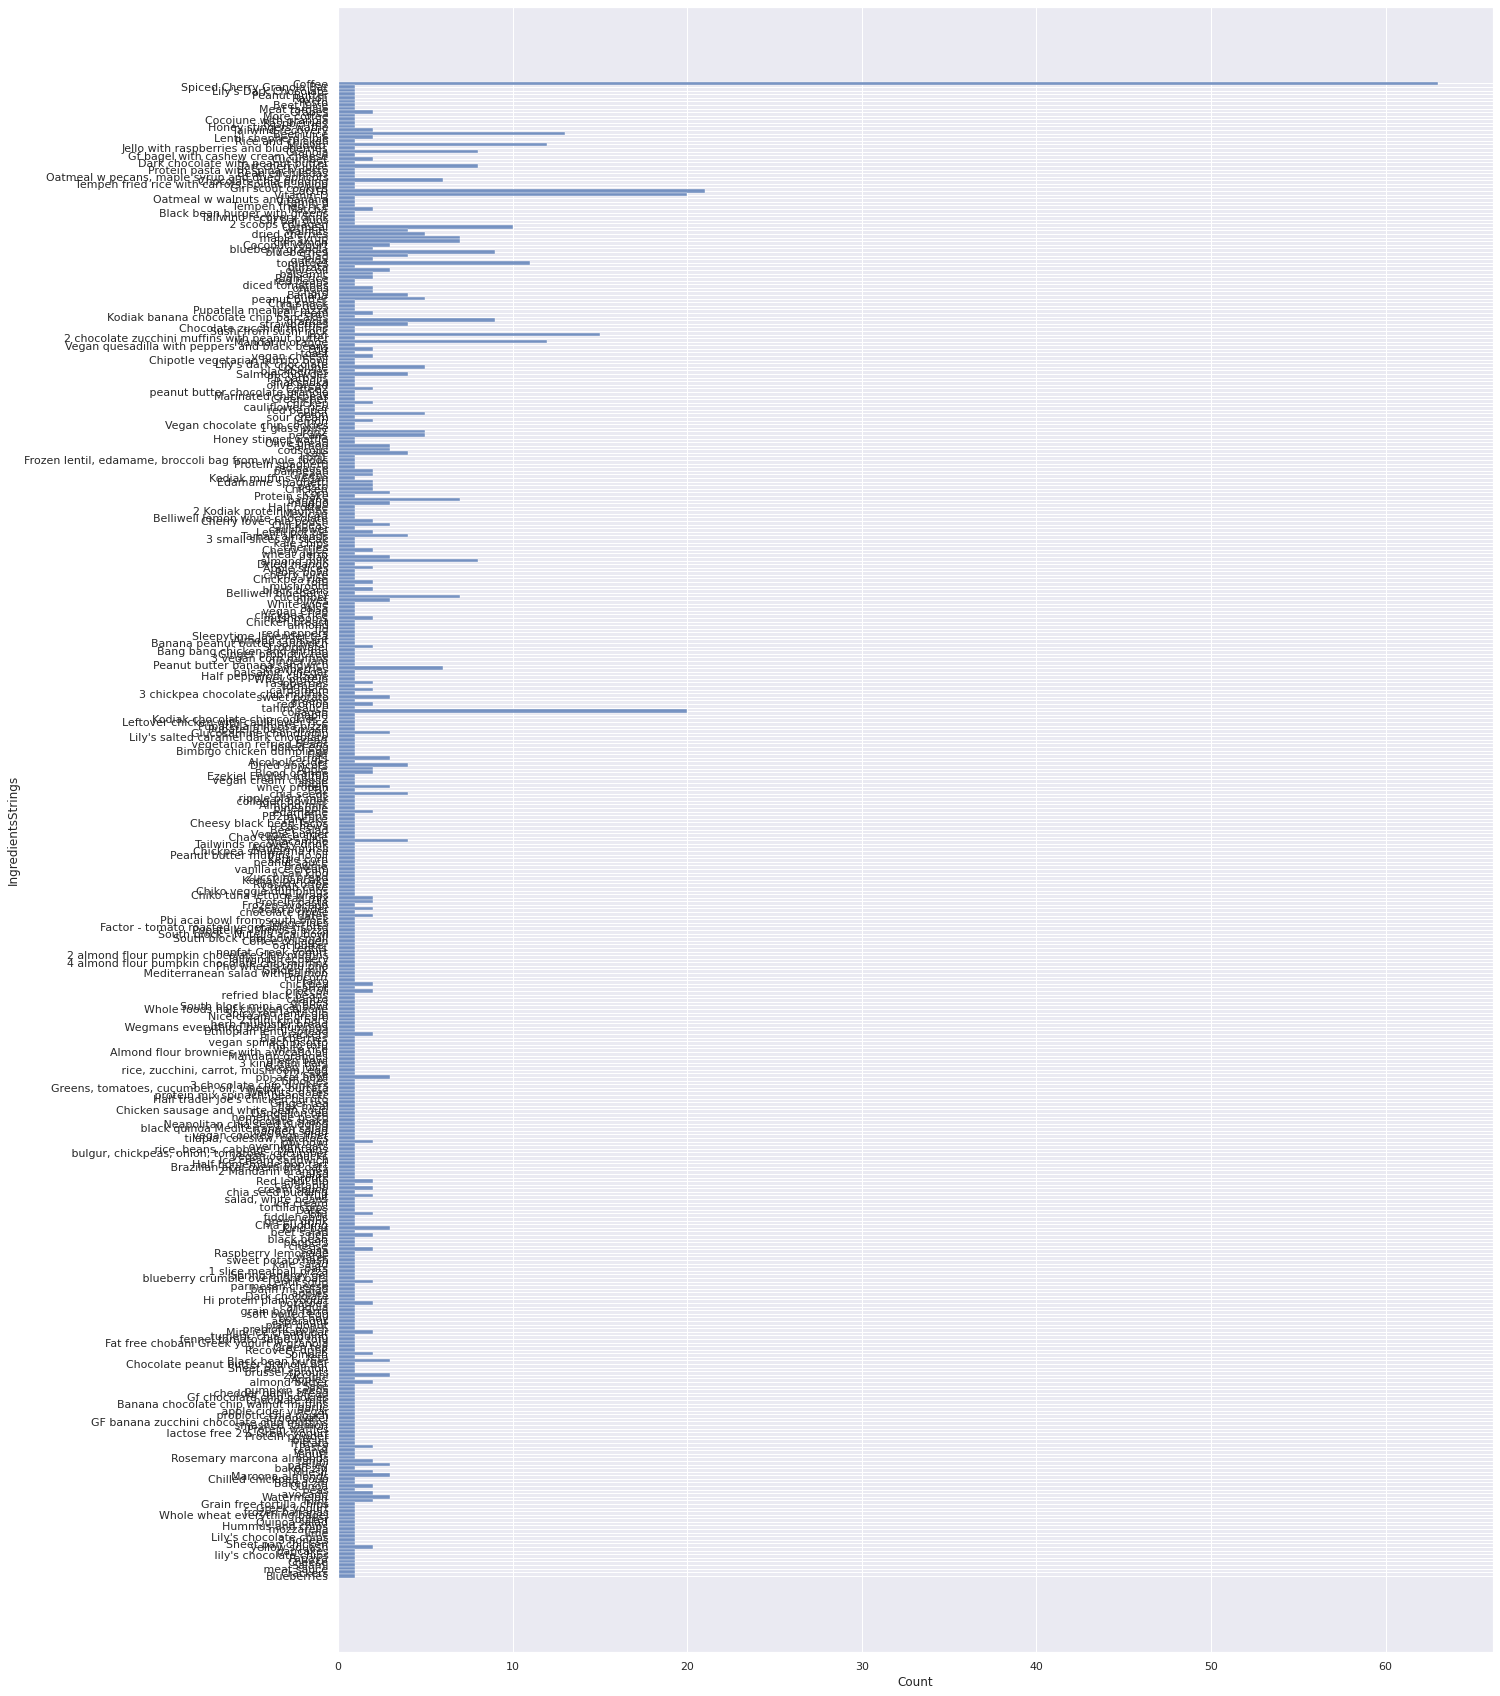

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20.7,30.27)})
sns.histplot(foodDF_long, y="IngredientsStrings")

✅ Cleaned up Food Diary data

## Next: bring in categorizing data from foodb



In [24]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Learning/Projects/Strava History/Data/Food.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
food_categories = pd.read_csv(path)

In [26]:
food_categories

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
0,1,Angelica,Angelica keiskei,Angelica is a genus of about 60 species of tal...,NaN,Angelica,1.jpg,image/jpeg,111325.0,2012-04-20 09:29:57 UTC,...,Type 1,2011-02-09 00:37:14 UTC,2019-05-14 18:04:13 UTC,NaN,2.0,False,specific,357850.0,True,FOOD00001
1,2,Savoy cabbage,Brassica oleracea var. sabauda,Savoy cabbage (Brassica oleracea convar. capit...,NaN,Savoy cabbage,2.jpg,image/jpeg,155178.0,2012-04-20 09:39:54 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,1216010.0,True,FOOD00002
2,3,Silver linden,Tilia argentea,Tilia tomentosa (Silver Lime in the UK and Sil...,845789.0,Tilia tomentosa,3.jpg,image/jpeg,56367.0,2012-04-20 09:41:25 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-17 16:19:45 UTC,NaN,NaN,False,specific,NaN,True,FOOD00003
3,4,Kiwi,Actinidia chinensis,"The kiwifruit, often shortened to kiwi in many...",506775.0,Kiwifruit,4.jpg,image/jpeg,110661.0,2012-04-20 09:32:21 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,3625.0,True,FOOD00004
4,5,Allium,Allium,Allium haematochiton is a species of wild onio...,42634.0,Allium haematochiton,5.jpg,image/jpeg,341911.0,2012-04-20 09:37:44 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,4678.0,True,FOOD00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1020,Cape gooseberry,Physalis peruviana,"Physalis peruviana, a plant species of the gen...",NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-01-24 17:05:37 UTC,2020-01-24 17:05:37 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00988
988,1021,Herbal tea,NaN,Herbal teas are the beverages made from the in...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 20:55:17 UTC,2020-03-12 20:55:17 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00989
989,1022,Fish oil,NaN,Fish oil is oil derived from the tissues of oi...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 21:00:02 UTC,2020-03-12 21:00:02 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00990
990,1023,Taco shell,NaN,The hard-shell or crispy taco is a tradition t...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 2,2020-03-12 21:01:58 UTC,2020-03-12 21:01:58 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00991


In [27]:
food_categories['name_lower'] = [food_categories.name[i].lower() for i in range(0, len(food_categories))]

In [28]:
food_categories.columns

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at', 'legacy_id', 'food_group',
       'food_subgroup', 'food_type', 'created_at', 'updated_at', 'creator_id',
       'updater_id', 'export_to_afcdb', 'category', 'ncbi_taxonomy_id',
       'export_to_foodb', 'public_id', 'name_lower'],
      dtype='object')

In [29]:
food_categories_dta = food_categories[['name_lower', 'food_group', 'food_subgroup', 'food_type']]

In [30]:
food_categories_dta

,name_lower,food_group,food_subgroup,food_type
0,angelica,Herbs and Spices,Herbs,Type 1
1,savoy cabbage,Vegetables,Cabbages,Type 1
2,silver linden,Herbs and Spices,Herbs,Type 1
3,kiwi,Fruits,Tropical fruits,Type 1
4,allium,Vegetables,Onion-family vegetables,Type 1
...,...,...,...,...
987,cape gooseberry,Fruits,Berries,Type 1
988,herbal tea,Teas,Teas,Type 1
989,fish oil,NaN,NaN,Type 1
990,taco shell,NaN,NaN,Type 2


In [31]:
foodDF_long.columns = foodDF_long.columns.str.replace(' ', '')

In [32]:
foodDF_long['IngStringLower'] = foodDF_long.IngredientsStrings.apply(lambda x: x.lower())

In [33]:
foodDF_long

,Day,Category,Link,Source,row,IngredientsStrings,IngStringLower
0,1/31/2022,Morning Drink,,NaN,0,Coffee,coffee
1,1/31/2022,Breakfast,https://meals.richroll.com/recipe/5c9a6fe6ebb6...,NaN,1,Spiced Cherry Granola Bar,spiced cherry granola bar
2,1/31/2022,Snack,https://lilys.com/products/sea-salt,NaN,2,Lily's Dark Chocolate,lily's dark chocolate
3,1/31/2022,Snack,,NaN,3,Peanut Butter,peanut butter
4,1/31/2022,Dinner,,NaN,4,Ravioli,ravioli
...,...,...,...,...,...,...,...
826,8/14/2022,Snack,,NaN,527,Salami,salami
827,8/14/2022,Dinner,,NaN,528,Pasta,pasta
828,8/14/2022,Dinner,,NaN,528,meat sauce,meat sauce
829,8/14/2022,Snack,,NaN,529,Crackers,crackers


In [34]:
import difflib 

In [35]:
foodDF_long['name_lower'] = foodDF_long['IngStringLower']

In [36]:
foodDF_long.head()

,Day,Category,Link,Source,row,IngredientsStrings,IngStringLower,name_lower
0,1/31/2022,Morning Drink,,NaN,0,Coffee,coffee,coffee
1,1/31/2022,Breakfast,https://meals.richroll.com/recipe/5c9a6fe6ebb6...,NaN,1,Spiced Cherry Granola Bar,spiced cherry granola bar,spiced cherry granola bar
2,1/31/2022,Snack,https://lilys.com/products/sea-salt,NaN,2,Lily's Dark Chocolate,lily's dark chocolate,lily's dark chocolate
3,1/31/2022,Snack,,NaN,3,Peanut Butter,peanut butter,peanut butter
4,1/31/2022,Dinner,,NaN,4,Ravioli,ravioli,ravioli


In [37]:
food_categories_dta.head()

,name_lower,food_group,food_subgroup,food_type
0,angelica,Herbs and Spices,Herbs,Type 1
1,savoy cabbage,Vegetables,Cabbages,Type 1
2,silver linden,Herbs and Spices,Herbs,Type 1
3,kiwi,Fruits,Tropical fruits,Type 1
4,allium,Vegetables,Onion-family vegetables,Type 1


In [39]:
Unique_ingredients = pd.DataFrame(data=foodDF_long['IngStringLower'].unique(), columns=['Ingredients'])

In [40]:
Unique_ingredients.head()

,Ingredients
0,coffee
1,spiced cherry granola bar
2,lily's dark chocolate
3,peanut butter
4,ravioli


In [41]:
# Much of this is coming from here: https://predictivehacks.com/fuzzy-joins-tutorial/
# Cross join
Unique_ingredients['dummy'] = True
food_categories_dta['dummy'] = True
combos = pd.merge(Unique_ingredients, food_categories_dta, on=['dummy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
combos

,Ingredients,dummy,name_lower,food_group,food_subgroup,food_type
0,coffee,True,angelica,Herbs and Spices,Herbs,Type 1
1,coffee,True,savoy cabbage,Vegetables,Cabbages,Type 1
2,coffee,True,silver linden,Herbs and Spices,Herbs,Type 1
3,coffee,True,kiwi,Fruits,Tropical fruits,Type 1
4,coffee,True,allium,Vegetables,Onion-family vegetables,Type 1
...,...,...,...,...,...,...
410683,blueberries,True,cape gooseberry,Fruits,Berries,Type 1
410684,blueberries,True,herbal tea,Teas,Teas,Type 1
410685,blueberries,True,fish oil,NaN,NaN,Type 1
410686,blueberries,True,taco shell,NaN,NaN,Type 2


In [ ]:
import